In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error


# Preprocess

In [2]:
# Import datasets
df_x = pd.read_csv("sncf_data/train_f_x.csv")
df_y = pd.read_csv("sncf_data/y_train_sncf.csv")
print(df_x.head())
print(df_y.head())


         date station  job  ferie  vacances
0  2015-01-01     1J7    1      1         1
1  2015-01-01     O2O    1      1         1
2  2015-01-01     8QR    1      1         1
3  2015-01-01     UMC    1      1         1
4  2015-01-01     FK3    1      1         1
            index   y
0  2015-01-01_1J7   7
1  2015-01-01_O2O   0
2  2015-01-01_8QR   9
3  2015-01-01_UMC   9
4  2015-01-01_FK3  28


In [3]:
# Pre-process df_y
df_y[['date', 'station']] = df_y['index'].str.split('_', expand=True)
df_y['date'] = pd.to_datetime(df_y['date'], format='%Y-%m-%d')
df_y = df_y.sort_values(by=['date', 'station'])
print(df_y['date'].dtype == 'datetime64[ns]')
df_y.drop('index', axis=1, inplace=True)
print(df_y.isna().any().any())
print(df_y.head())


True
False
        y       date station
161    30 2015-01-01     003
302   777 2015-01-01     033
410  1832 2015-01-01     034
284    16 2015-01-01     09U
230     0 2015-01-01     0CM


In [4]:
# Pre-process df_x
df_x['date'] = pd.to_datetime(df_x['date'], format='%Y-%m-%d')
print(df_x['date'].dtype == 'datetime64[ns]')
print(df_x.head())
print(df_x.isna().any().any())
df_x = df_x.sort_values(by=['date', 'station'])


True
        date station  job  ferie  vacances
0 2015-01-01     1J7    1      1         1
1 2015-01-01     O2O    1      1         1
2 2015-01-01     8QR    1      1         1
3 2015-01-01     UMC    1      1         1
4 2015-01-01     FK3    1      1         1
False


In [5]:
df_x = df_x.reset_index(drop=True)
df_y= df_y.reset_index(drop=True)

In [6]:
df_x.head()

,date,station,job,ferie,vacances
0,2015-01-01,003,1,1,1
1,2015-01-01,033,1,1,1
2,2015-01-01,034,1,1,1
3,2015-01-01,09U,1,1,1
4,2015-01-01,0CM,1,1,1


In [7]:
df_y.head()

,y,date,station
0,30,2015-01-01,003
1,777,2015-01-01,033
2,1832,2015-01-01,034
3,16,2015-01-01,09U
4,0,2015-01-01,0CM


In [8]:
# Verify that everything is correct
print(df_x.describe())
print(df_y.describe())
print(df_x[['date', 'station']].equals(df_y[['date', 'station']]))


                                date           job         ferie      vacances
count                        1229863  1.229863e+06  1.229863e+06  1.229863e+06
mean   2018-12-29 15:14:03.275388928  7.171587e-01  2.986105e-02  3.395712e-01
min              2015-01-01 00:00:00  0.000000e+00  0.000000e+00  0.000000e+00
25%              2016-12-30 00:00:00  0.000000e+00  0.000000e+00  0.000000e+00
50%              2018-12-21 00:00:00  1.000000e+00  0.000000e+00  0.000000e+00
75%              2021-01-04 00:00:00  1.000000e+00  0.000000e+00  1.000000e+00
max              2022-12-31 00:00:00  1.000000e+00  1.000000e+00  1.000000e+00
std                              NaN  4.503801e-01  1.702040e-01  4.735639e-01
                  y                           date
count  1.229863e+06                        1229863
mean   3.930904e+03  2018-12-29 15:14:03.275388928
min    0.000000e+00            2015-01-01 00:00:00
25%    2.180000e+02            2016-12-30 00:00:00
50%    1.108000e+03            201

# First plots

In [9]:
# Plot by station
print(df_x['station'].unique())
print(df_x['station'].iloc[2])


['003' '033' '034' '09U' '0CM' '0GU' '0JU' '0S9' '0TR' '0WC' '0Y9' '0YY'
 '0ZP' '11W' '12Q' '182' '18L' '193' '19G' '1AA' '1EB' '1EJ' '1EX' '1I8'
 '1J7' '1PW' '1TE' '1TQ' '1VL' '214' '222' '23N' '25G' '26J' '276' '289'
 '294' '2AC' '2EW' '2P1' '2PZ' '2SG' '2T1' '2UV' '2YA' '30I' '30R' '34L'
 '357' '3KU' '3NQ' '3NS' '3T2' '3W6' '3XF' '3Y4' '43B' '45E' '47F' '488'
 '495' '4AH' '4CZ' '4EG' '4IM' '4MO' '4PO' '4RW' '4SH' '4UY' '4V8' '4WI'
 '4YU' '52H' '56P' '56W' '59A' '5GK' '5KB' '5KJ' '5MR' '5PK' '5S5' '5SM'
 '5U5' '5WG' '5ZC' '651' '6A9' '6DU' '6E0' '6FB' '6HE' '6TL' '6UW' '6VM'
 '6WR' '700' '72S' '745' '7EJ' '7NG' '856' '87K' '8E0' '8PU' '8QR' '8WZ'
 '8X9' '8XN' '92P' '94K' '959' '969' '9IN' '9IV' '9LN' '9MC' '9P6' '9RF'
 '9WY' 'A1R' 'A8Q' 'AGN' 'AK3' 'ANI' 'AOH' 'AOW' 'APM' 'APN' 'ARC' 'AZV'
 'B34' 'B3D' 'B3W' 'B45' 'B5A' 'B61' 'B65' 'B8A' 'B9M' 'BC6' 'BE1' 'BHE'
 'BI7' 'BJ5' 'BJM' 'BKJ' 'BL1' 'BNR' 'BPW' 'BRP' 'BRZ' 'BUH' 'BUY' 'BZ0'
 'BZL' 'C3A' 'C4L' 'C5E' 'CET' 'CJP' 'CM6' 'CQT' 'C

In [10]:

def plot_unique_station_2022(station_name):
    table_station = df_y[(df_y['station'] == station_name) & (df_y['date'].dt.year == 2022)]
    plt.figure()
    plt.plot(table_station['date'], table_station['y'], linestyle='-')
    plt.show()

def plot_unique_station_all_years(station_name):
    table_station = df_y[df_y['station'] == station_name]
    plt.figure()
    plt.plot(table_station['date'], table_station['y'], linestyle='-')
    plt.show()

def plot_avg_station_2022():
    df_y_2022 = df_y[df_y['date'].dt.year == 2022]
    df_x_2022 = df_x[(df_x['date'].dt.year == 2022) & (df_x['station'] == "1J7")]
    avg_y = df_y_2022.groupby('date')['y'].mean().reset_index()
    plt.figure()
    plt.plot(avg_y['date'], avg_y['y'], linestyle='-')
    print(df_x_2022['vacances'].describe())
    plt.scatter(df_x_2022['date'], 6000 * df_x_2022['vacances'], color='red')
    plt.scatter(df_x_2022['date'], 6000 * df_x_2022['ferie'], color='green')
    plt.show()
    
def plot_avg_station_2022():
    df_y_2022 = df_y[df_y['date'].dt.year == 2022]
    df_x_2022 = df_x[(df_x['date'].dt.year == 2022) & (df_x['station'] == "1J7")]
    avg_y = df_y_2022.groupby('date')['y'].mean().reset_index()
    plt.figure()
    plt.plot(avg_y['date'], avg_y['y'], linestyle='-')
    plt.scatter(df_x_2022['date'], 6000 * df_x_2022['vacances'], color='red')
    plt.scatter(df_x_2022['date'], 6000 * df_x_2022['ferie'], color='green')
    plt.show()


def plot_avg_station_all_years():
    avg_y = df_y.groupby('date')['y'].mean().reset_index()
    df_x_1j7 = df_x[df_x['station'] == "1J7"]
    plt.figure()
    plt.plot(avg_y['date'], avg_y['y'], linestyle='-')
    plt.scatter(df_x_1j7['date'], 6000 * df_x_1j7['vacances'], color='red')
    plt.show()


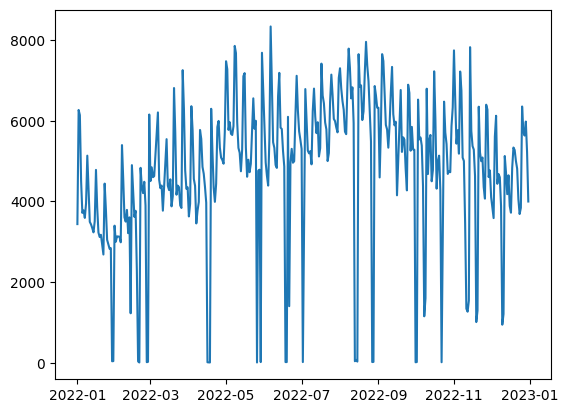

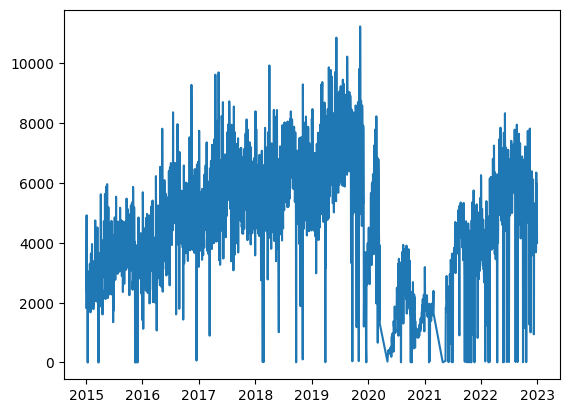

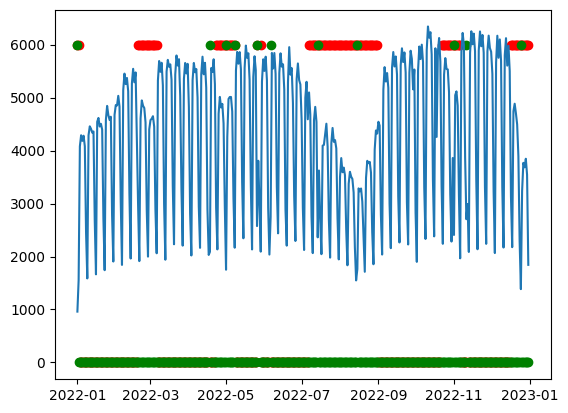

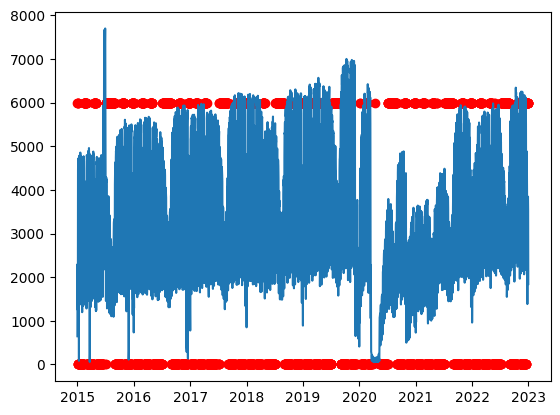

In [11]:
plot_unique_station_2022(df_y['station'].iloc[2])
plot_unique_station_all_years(df_y['station'].iloc[2])
plot_avg_station_2022()
plot_avg_station_all_years()


# Identical features columns

In [12]:
def assert_columns_same(df, date_column='date', columns_to_check=['job', 'ferie', 'vacances']):
    grouped = df.groupby(date_column)
    for date, group in grouped:
        for column in columns_to_check:
            if not (group[column] == group[column].iloc[0]).all():
                raise AssertionError(f"Values in column '{column}' are not the same for date {date}")

# Apply the assertion function to df_x
assert_columns_same(df_x)

print("All values in columns 'job', 'ferie', and 'vacances' are the same for each date.")

All values in columns 'job', 'ferie', and 'vacances' are the same for each date.


# Missing dates 

In [13]:
import pandas as pd


# Create complete date ranges
complete_date_range_x = pd.date_range(start=df_x['date'].min(), end=df_x['date'].max())
complete_date_range_y = pd.date_range(start=df_y['date'].min(), end=df_y['date'].max())

df_x[df_x['station']=='QD6']

,date,station,job,ferie,vacances
1164256,2022-08-02,QD6,1,0,1
1164672,2022-08-03,QD6,1,0,1
1165091,2022-08-04,QD6,1,0,1
1165503,2022-08-05,QD6,1,0,1
1165913,2022-08-06,QD6,0,0,1
...,...,...,...,...,...
1192219,2022-10-06,QD6,1,0,0
1192658,2022-10-07,QD6,1,0,0
1193093,2022-10-08,QD6,0,0,0
1193527,2022-10-09,QD6,0,0,0


In [14]:
def fill_missing_dates(df, station_column='station', date_column='date'):
    complete_date_range = pd.date_range(start=df[date_column].min(), end=df[date_column].max())
    df = df.set_index(date_column)
    df = df.groupby(station_column).apply(lambda group: group.reindex(complete_date_range))
    df.index=df.index.set_names(['station', 'date'])
    df=df.reset_index(level='date')
    df=df.reset_index(drop=True)
    return df

df_x_filled = fill_missing_dates(df_x)
df_y_filled = fill_missing_dates(df_y)


C:\Users\Théo\AppData\Local\Temp\ipykernel_28644\216329725.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby(station_column).apply(lambda group: group.reindex(complete_date_range))
C:\Users\Théo\AppData\Local\Temp\ipykernel_28644\216329725.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby(station_column).apply(lambda group: group.reindex(complete_date_range))


In [15]:
df_x_filled

,date,station,job,ferie,vacances
0,2015-01-01,003,1.0,1.0,1.0
1,2015-01-02,003,1.0,0.0,1.0
2,2015-01-03,003,0.0,0.0,1.0
3,2015-01-04,003,0.0,0.0,1.0
4,2015-01-05,003,1.0,0.0,0.0
...,...,...,...,...,...
1282753,2022-12-27,ZXY,1.0,0.0,1.0
1282754,2022-12-28,ZXY,1.0,0.0,1.0
1282755,2022-12-29,ZXY,1.0,0.0,1.0
1282756,2022-12-30,ZXY,1.0,0.0,1.0


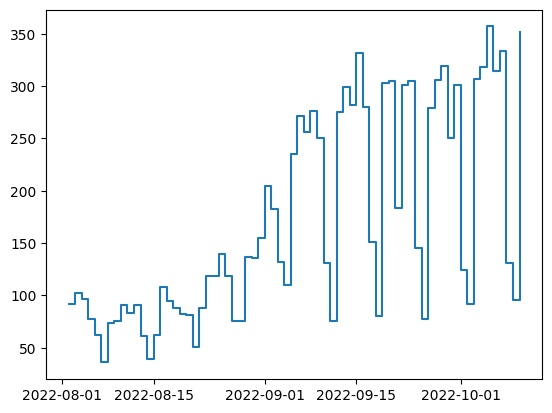

,y,date,station
1164256,92,2022-08-02,QD6
1164672,102,2022-08-03,QD6
1165091,97,2022-08-04,QD6
1165503,78,2022-08-05,QD6
1165913,62,2022-08-06,QD6
...,...,...,...
1192219,314,2022-10-06,QD6
1192658,334,2022-10-07,QD6
1193093,131,2022-10-08,QD6
1193527,96,2022-10-09,QD6


In [16]:

def plot_unique_station_2022(station_name):
    table_station = df_y_filled[(df_y_filled['station'] == station_name) & (df_y_filled['date'].dt.year == 2022)]
    plt.figure()
    plt.plot(table_station['date'], table_station['y'], linestyle='-', drawstyle='steps-post')
    plt.show()
# plot_unique_station_2022(df_y_filled['station'].iloc[2])
plot_unique_station_2022('QD6')
df_y[(df_y['station'] == 'QD6') & (df_y['date'].dt.year == 2022)]

In [17]:
print("Rows with NaN values in df_x_filled:")
print(df_x_filled[df_x_filled.isna().any(axis=1)])

print("Rows with NaN values in df_y_filled:")
print(df_y_filled[df_y_filled.isna().any(axis=1)])

Rows with NaN values in df_x_filled:
              date station  job  ferie  vacances
167     2015-06-17     NaN  NaN    NaN       NaN
168     2015-06-18     NaN  NaN    NaN       NaN
169     2015-06-19     NaN  NaN    NaN       NaN
170     2015-06-20     NaN  NaN    NaN       NaN
171     2015-06-21     NaN  NaN    NaN       NaN
...            ...     ...  ...    ...       ...
1277873 2017-08-17     NaN  NaN    NaN       NaN
1278018 2018-01-09     NaN  NaN    NaN       NaN
1278036 2018-01-27     NaN  NaN    NaN       NaN
1278037 2018-01-28     NaN  NaN    NaN       NaN
1278740 2020-01-01     NaN  NaN    NaN       NaN

[52895 rows x 5 columns]
Rows with NaN values in df_y_filled:
              date   y station
167     2015-06-17 NaN     NaN
168     2015-06-18 NaN     NaN
169     2015-06-19 NaN     NaN
170     2015-06-20 NaN     NaN
171     2015-06-21 NaN     NaN
...            ...  ..     ...
1277873 2017-08-17 NaN     NaN
1278018 2018-01-09 NaN     NaN
1278036 2018-01-27 NaN     NaN
12

In [18]:
def group_fill_na_x(df):
    grouped = df.groupby('date')
    for date, group in grouped:
        for column in ['job', 'ferie', 'vacances']:
            if group[column].isna().any():
                fill_value = group[column].dropna().iloc[0] if not group['job'].empty else None
                df.loc[group.index, column] = df.loc[group.index, column].fillna(fill_value)
    return df
df_x_filled_no_na = group_fill_na_x(df_x_filled)


In [19]:
def group_fill_na_y(df):
    grouped = df.groupby('date')
    for date, group in grouped:
        for column in ['y']:
            if group[column].isna().any():
                df.loc[group.index, column] = group[column].interpolate(method='linear')
    return df
df_y_filled_no_na = group_fill_na_y(df_y_filled)



# Predicting Y

In [32]:
df = pd.merge(df_x_filled_no_na, df_y_filled_no_na, on=['date', 'station'])
# df=df[(df['station'] == "QD6")]
df=df[(df['station'] == "003")]



In [33]:

# Define features and target
X = df.drop(columns=['date', 'station', 'y'])
y = df['y']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the training set
y_train_pred = model.predict(X_train)

# Calculate the training loss (Mean Squared Error)
train_loss = mean_squared_error(y_train, y_train_pred)

# Calculate the R² score on the training set
train_r2 = r2_score(y_train, y_train_pred)

print(f"Training Loss (MSE): {train_loss}")
print(f"Training R² Score: {train_r2}")

# Predict on the testing set
y_test_pred = model.predict(X_test)

# Calculate the R² score on the testing set
test_r2 = r2_score(y_test, y_test_pred)

print(f"Testing R² Score: {test_r2}")

Training Loss (MSE): 16895.240547017263
Training R² Score: 0.47550524030485164
Testing R² Score: 0.5307268579232851


In [34]:

# Assume df is your initial DataFrame
# Extract seasonal features
df['month'] = df['date'].dt.month
df['day_of_week'] = df['date'].dt.dayofweek

# Define features and target
X = df.drop(columns=['date', 'station', 'y'])
y = df['y']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the training set
y_train_pred = model.predict(X_train)

# Calculate training loss (Mean Squared Error)
train_loss = mean_squared_error(y_train, y_train_pred)

# Calculate R² score on the training set
train_r2 = r2_score(y_train, y_train_pred)

print(f"Training Loss (MSE): {train_loss}")
print(f"Training R² Score: {train_r2}")

# Predict on the testing set
y_test_pred = model.predict(X_test)

# Calculate R² score on the testing set
test_r2 = r2_score(y_test, y_test_pred)

print(f"Testing R² Score: {test_r2}")

Training Loss (MSE): 16388.39481532172
Training R² Score: 0.49123972656495396
Testing R² Score: 0.5464182178683481


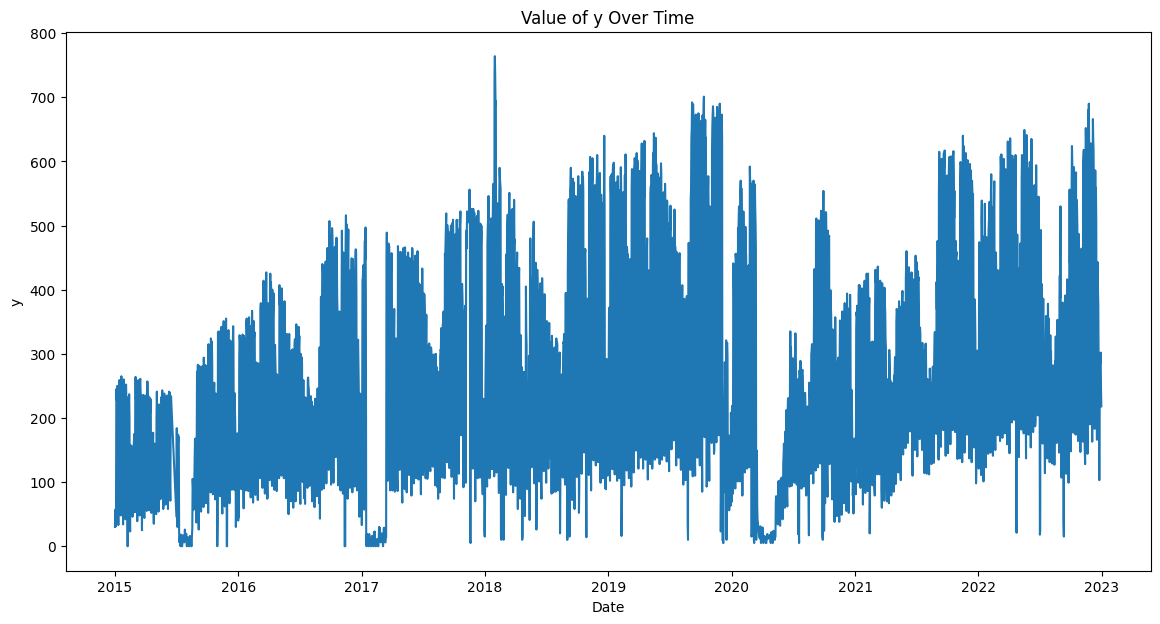

In [29]:
df = df.sort_values(by='date')

# Plot the values of 'y' over time
plt.figure(figsize=(14, 7))
sns.lineplot(x='date', y='y', data=df)
plt.title('Value of y Over Time')
plt.xlabel('Date')
plt.ylabel('y')
plt.show()

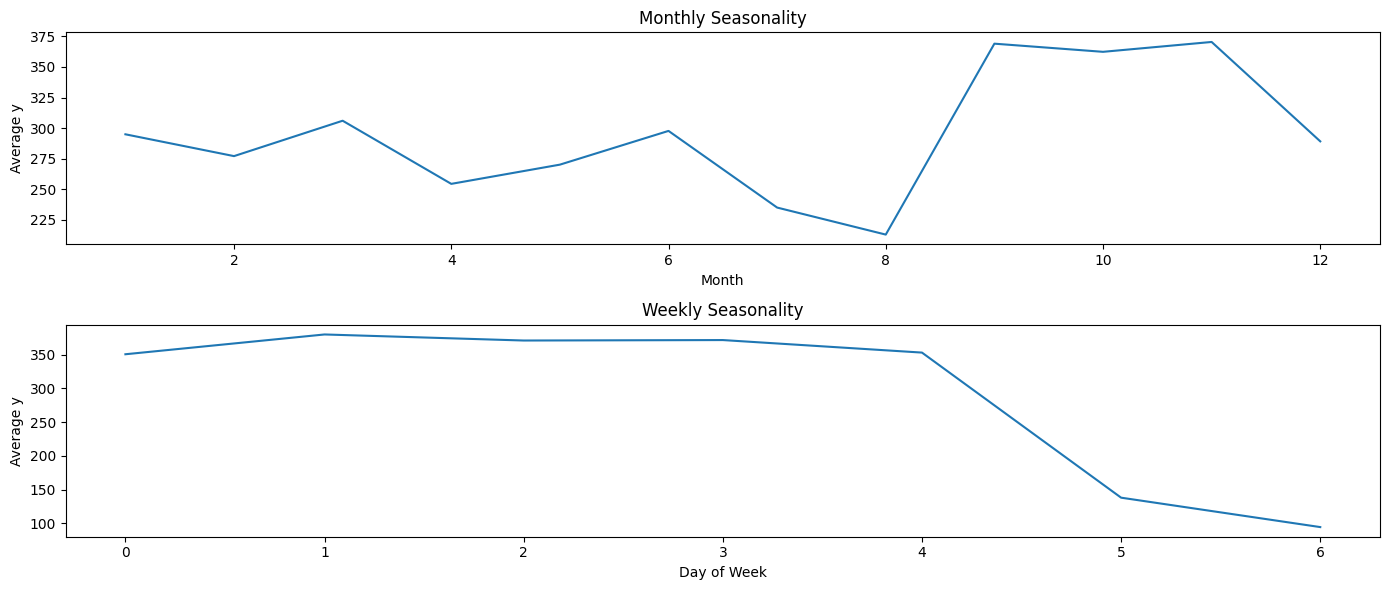

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the 'date' column is in datetime format and set it as the index
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Extract seasonal features
df['month'] = df.index.month
df['day_of_week'] = df.index.dayofweek

# Calculate the mean value for each month
monthly_seasonality = df.groupby('month')['y'].mean()

# Calculate the mean value for each day of the week
weekly_seasonality = df.groupby('day_of_week')['y'].mean()

# Plot the seasonal components
plt.figure(figsize=(14, 6))

# Monthly seasonality
plt.subplot(2, 1, 1)
sns.lineplot(x=monthly_seasonality.index, y=monthly_seasonality.values)
plt.title('Monthly Seasonality')
plt.xlabel('Month')
plt.ylabel('Average y')

# Weekly seasonality
plt.subplot(2, 1, 2)
sns.lineplot(x=weekly_seasonality.index, y=weekly_seasonality.values)
plt.title('Weekly Seasonality')
plt.xlabel('Day of Week')
plt.ylabel('Average y')

plt.tight_layout()
plt.show()